In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandata109.xlsx', index_col= 0)

In [3]:
identifier_columns = ['Country','ASBH02A','avgscore']
demographic_info_columns = ['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg','interpreting_process_avg', 'straightforward_process_avg','avgscore']

In [4]:
df['avgscore'] = df[positive_feelings_in_school].mean(axis=1)

In [5]:
df['avgscore_binned'] = pd.cut(df['avgscore'], bins=10)

In [6]:
# Create a contingency table
contingency_table = pd.crosstab(df['ASBH02A'], df['avgscore_binned'])

In [7]:
contingency_table.head()

avgscore_binned,"(0.997, 1.3]","(1.3, 1.6]","(1.6, 1.9]","(1.9, 2.2]","(2.2, 2.5]","(2.5, 2.8]","(2.8, 3.1]","(3.1, 3.4]","(3.4, 3.7]","(3.7, 4.0]"
ASBH02A,,,,,,,,,,
No,1317,496,256,190,88,32,36,13,14,16
Yes,13843,5485,3025,2071,1115,298,361,126,110,163


In [8]:
# Convert the contingency table to a format suitable for Plotly
contingency_table_reset = contingency_table.reset_index()

In [9]:
contingency_table_reset

avgscore_binned,ASBH02A,"(0.997, 1.3]","(1.3, 1.6]","(1.6, 1.9]","(1.9, 2.2]","(2.2, 2.5]","(2.5, 2.8]","(2.8, 3.1]","(3.1, 3.4]","(3.4, 3.7]","(3.7, 4.0]"
0,No,1317,496,256,190,88,32,36,13,14,16
1,Yes,13843,5485,3025,2071,1115,298,361,126,110,163


In [10]:
contingency_table_melted = contingency_table_reset.melt(id_vars='ASBH02A', var_name='avgscore_binned', value_name='count')

In [11]:
contingency_table_melted

,ASBH02A,avgscore_binned,count
0,No,"(0.997, 1.3]",1317
1,Yes,"(0.997, 1.3]",13843
2,No,"(1.3, 1.6]",496
3,Yes,"(1.3, 1.6]",5485
4,No,"(1.6, 1.9]",256
5,Yes,"(1.6, 1.9]",3025
6,No,"(1.9, 2.2]",190
7,Yes,"(1.9, 2.2]",2071
8,No,"(2.2, 2.5]",88
9,Yes,"(2.2, 2.5]",1115


In [12]:
# Convert Interval objects to strings
contingency_table_melted['avgscore_binned'] = contingency_table_melted['avgscore_binned'].astype(str)

In [13]:
contingency_table_melted

,ASBH02A,avgscore_binned,count
0,No,"(0.997, 1.3]",1317
1,Yes,"(0.997, 1.3]",13843
2,No,"(1.3, 1.6]",496
3,Yes,"(1.3, 1.6]",5485
4,No,"(1.6, 1.9]",256
5,Yes,"(1.6, 1.9]",3025
6,No,"(1.9, 2.2]",190
7,Yes,"(1.9, 2.2]",2071
8,No,"(2.2, 2.5]",88
9,Yes,"(2.2, 2.5]",1115


In [14]:
# Calculate total counts for 'No' and 'Yes'
total_no = contingency_table_melted[contingency_table_melted['ASBH02A'] == 'No']['count'].sum()
total_yes = contingency_table_melted[contingency_table_melted['ASBH02A'] == 'Yes']['count'].sum()

# Calculate the percentage
contingency_table_melted['percentage'] = contingency_table_melted.apply(lambda row: (row['count'] / total_no * 100) if row['ASBH02A'] == 'No' else (row['count'] / total_yes * 100), axis=1)

Make sure to change categories to fit with the data. 

In [16]:
# Convert avgscore_binned to categorical with the specified order
contingency_table_melted['avgscore_binned'] = pd.Categorical(contingency_table_melted['avgscore_binned'], 
                                       categories=[
                                           '(0.997, 1.3]','(1.3, 1.6]','(1.6, 1.9]','(1.9, 2.2]','(2.2, 2.5]','(2.5, 2.8]','(2.8, 3.1]','(3.1, 3.4]','(3.4, 3.7]','(3.7, 4.0]'], 
                                       ordered=True)

In [17]:
contingency_table_melted

,ASBH02A,avgscore_binned,count,percentage
0,No,"(0.997, 1.3]",1317,53.580146
1,Yes,"(0.997, 1.3]",13843,52.047223
2,No,"(1.3, 1.6]",496,20.179007
3,Yes,"(1.3, 1.6]",5485,20.622627
4,No,"(1.6, 1.9]",256,10.414972
5,Yes,"(1.6, 1.9]",3025,11.373463
6,No,"(1.9, 2.2]",190,7.729862
7,Yes,"(1.9, 2.2]",2071,7.786592
8,No,"(2.2, 2.5]",88,3.580146
9,Yes,"(2.2, 2.5]",1115,4.192202


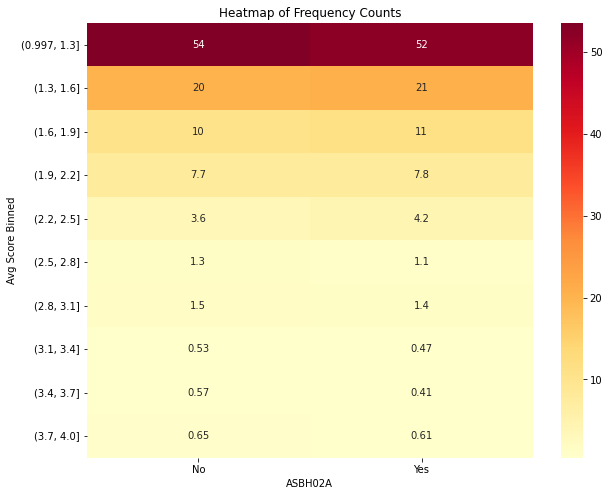

In [18]:
# Assuming contingency_table_melted is your DataFrame
# You might need to pivot the DataFrame to create a matrix for the heatmap
## index, column, values
heatmap_data = contingency_table_melted.pivot(index = "avgscore_binned", columns = "ASBH02A", values = "percentage")

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True)

# Add title and labels
plt.title('Heatmap of Frequency Counts')
plt.xlabel('ASBH02A')
plt.ylabel('Avg Score Binned')

# Show the plot
plt.show()

## Now I will compare by country.

In [19]:
# Create a contingency table
contingency_table2 = pd.crosstab(index = [df['ASBH02A'], df['Country']],columns=df['avgscore_binned'])

In [20]:
# Convert the contingency table to a format suitable for Plotly
contingency_table2_reset = contingency_table2.reset_index()
contingency_table2_melted = contingency_table2_reset.melt(id_vars=['ASBH02A','Country'], var_name='avgscore_binned', value_name='count')
# Convert Interval objects to strings
contingency_table2_melted['avgscore_binned'] = contingency_table2_melted['avgscore_binned'].astype(str)

In [21]:
df_yes = contingency_table2_melted[contingency_table2_melted['ASBH02A'] == 'Yes']

In [22]:
df_yes

,ASBH02A,Country,avgscore_binned,count
7,Yes,Austria,"(0.997, 1.3]",1841
8,Yes,Egypt,"(0.997, 1.3]",4059
9,Yes,France,"(0.997, 1.3]",1198
10,Yes,Germany,"(0.997, 1.3]",1117
11,Yes,Jordan,"(0.997, 1.3]",3418
12,Yes,Netherlands,"(0.997, 1.3]",1067
13,Yes,Sweden,"(0.997, 1.3]",1143
21,Yes,Austria,"(1.3, 1.6]",986
22,Yes,Egypt,"(1.3, 1.6]",927
23,Yes,France,"(1.3, 1.6]",1292


In [23]:
heatmap_yes = df_yes.pivot(index='Country',columns="avgscore_binned",values = "count")

In [24]:
heatmap_yes["total"]= heatmap_yes.sum(axis=1)
# Assuming your DataFrame is named df
# Copy the total column to a variable, we'll use it for division later
total_column_yes = heatmap_yes['total']

# Dividing all columns except the 'total' column by the 'total' column of that row
df_percentage_yes = heatmap_yes.div(total_column_yes, axis=0) * 100
df_percentage_yes = df_percentage_yes.drop("total", axis = 1)
# Convert the contingency table to a format suitable for Plotly
df_percentage_yes_reset = df_percentage_yes.reset_index()
df_percentage__yes_melted = df_percentage_yes_reset.melt(id_vars='Country', var_name='avgscore_binned', value_name='percentage')

In [25]:
# Convert Interval objects to strings
df_percentage__yes_melted['avgscore_binned'] = df_percentage__yes_melted['avgscore_binned'].astype(str)

In [26]:
# Convert avgscore_binned to categorical with the specified order
df_percentage__yes_melted['avgscore_binned'] = pd.Categorical(df_percentage__yes_melted['avgscore_binned'], 
                                       categories=[
                                           '(0.997, 1.3]','(1.3, 1.6]','(1.6, 1.9]','(1.9, 2.2]','(2.2, 2.5]','(2.5, 2.8]','(2.8, 3.1]','(3.1, 3.4]','(3.4, 3.7]','(3.7, 4.0]'], 
                                       ordered=True)

In [27]:
heatmap_percent_yes = df_percentage__yes_melted.pivot(index = "avgscore_binned", columns = "Country", values = "percentage")

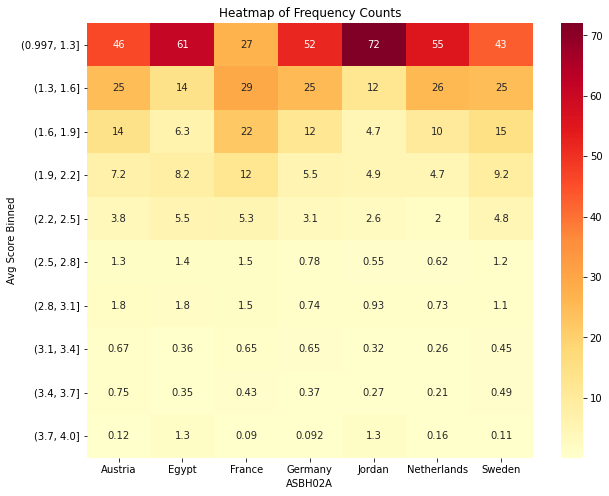

In [28]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_percent_yes, cmap='YlOrRd', annot=True)

# Add title and labels
plt.title('Heatmap of Frequency Counts')
plt.xlabel('ASBH02A')
plt.ylabel('Avg Score Binned')

# Show the plot
plt.show()

In [29]:
df_no = contingency_table2_melted[contingency_table2_melted['ASBH02A'] == 'No']
df_no= df_no.drop('ASBH02A', axis=1)
heatmap_no = df_no.pivot(index='Country',columns="avgscore_binned",values = "count")

In [30]:
heatmap_no["total"] = heatmap_no.sum(axis=1)
# Assuming your DataFrame is named df
# Copy the total column to a variable, we'll use it for division later
total_column_no = heatmap_no['total']

# Dividing all columns except the 'total' column by the 'total' column of that row
df_percentage_no = heatmap_no.div(total_column_no, axis=0) * 100
df_percentage_no = df_percentage_no.drop("total", axis=1)
# Convert the contingency table to a format suitable for Plotly
df_percentage_no_reset = df_percentage_no.reset_index()
df_percentage_no_melted = df_percentage_no_reset.melt(id_vars='Country', var_name='avgscore_binned', value_name='percentage')


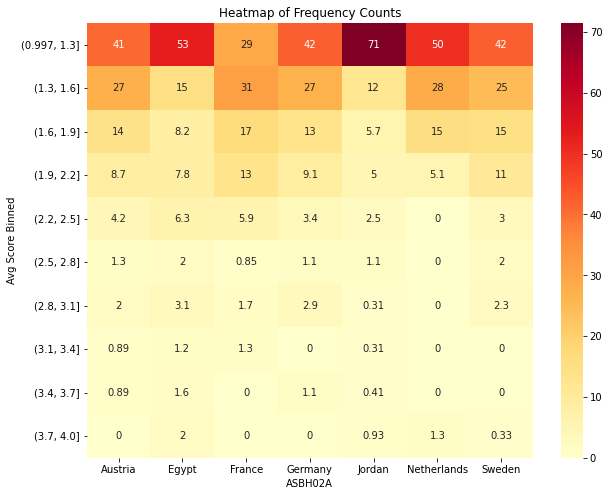

In [31]:
# Convert Interval objects to strings
df_percentage_no_melted['avgscore_binned'] = df_percentage_no_melted['avgscore_binned'].astype(str)

# Convert avgscore_binned to categorical with the specified order
# Convert avgscore_binned to categorical with the specified order
df_percentage_no_melted['avgscore_binned'] = pd.Categorical(df_percentage_no_melted['avgscore_binned'], 
                                       categories=[
                                           '(0.997, 1.3]','(1.3, 1.6]','(1.6, 1.9]','(1.9, 2.2]','(2.2, 2.5]','(2.5, 2.8]','(2.8, 3.1]','(3.1, 3.4]','(3.4, 3.7]','(3.7, 4.0]'], 
                                       ordered=True)

heatmap_percent_no = df_percentage_no_melted.pivot(index="avgscore_binned", columns="Country", values="percentage")

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_percent_no, cmap='YlOrRd', annot=True)

# Add title and labels
plt.title('Heatmap of Frequency Counts')
plt.xlabel('ASBH02A')
plt.ylabel('Avg Score Binned')

# Show the plot
plt.show()


## Now let's plot the two on the same figure to compare

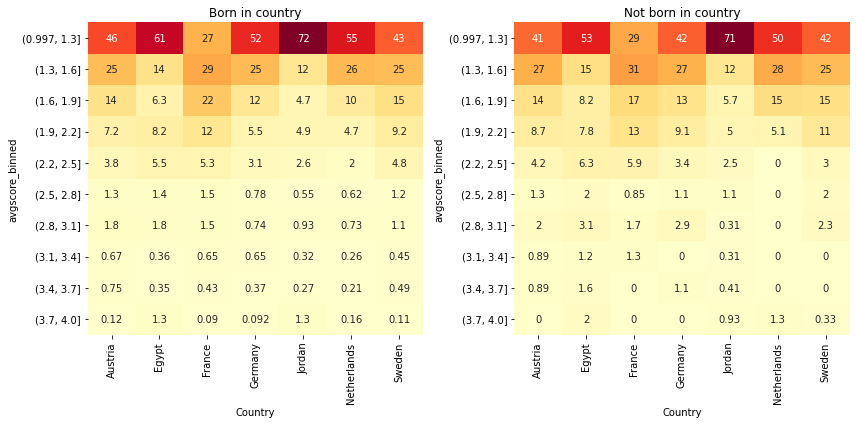

In [32]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_percent_yes, ax=axes[0], cmap='YlOrRd', annot=True, cbar=False)
sns.heatmap(heatmap_percent_no, ax=axes[1], cmap='YlOrRd', annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Country', ylabel='avgscore_binned'>

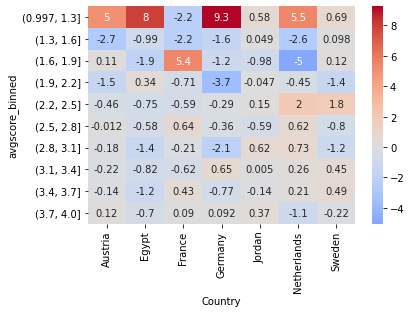

In [33]:
diff_data = heatmap_percent_yes - heatmap_percent_no

# Plot the difference heatmap
sns.heatmap(diff_data, cmap="coolwarm", annot = True, center=0)

Can also now split the dataframes into countries and plot the countries side by side.